# Analiza Podatkov

### Članki o Slovencih na Wikipediji

In [1]:
import pandas as pd
import numpy
pd.options.display.max_rows = 111
%matplotlib inline

In [2]:
podatki = pd.read_csv("podatki/podatki.csv", encoding = "utf-8")
poklici = pd.read_csv("podatki/poklici.csv", encoding = "utf-8")
poklici_merge = pd.merge(poklici, podatki, left_on = "ID", right_on = "ID")

In [3]:
mrtvi = podatki[podatki.Stanje == "Mrtev"]
zelo_znani = podatki[(podatki["Ogledi Slo"] > 100) & (podatki["Ogledi Ang"] > 100)]
zivi = podatki[podatki.Stanje == "Živ"]
zenske = podatki[podatki.Spol == "Ženska"]
moski = podatki[podatki.Spol == "Moški"]

def prestej(dataframe):
    return dataframe.ID.count()

print("Skupno število oseb: {}".format(prestej(podatki)))
print("Zelo znane osebe: {}".format(prestej(zelo_znani)))
print("Moški: {}".format(prestej(moski)))
print("Ženske: {}".format(prestej(zenske)))
print("Živi: {}".format(prestej(zivi)))
print("Mrtvi: {}".format(prestej(mrtvi)))

Skupno število oseb: 2442
Zelo znane osebe: 351
Moški: 1914
Ženske: 528
Živi: 1653
Mrtvi: 758


### Povprečne vrednosti
**Povprečja:**

In [4]:
podatki[["Ogledi Slo", "Ogledi Ang", "Povezave Slo", "Povezave Ang", "Dolžina Slo", "Dolžina Ang"]].mean().round(1)

Ogledi Slo      100.8
Ogledi Ang      419.7
Povezave Slo     89.2
Povezave Ang     55.6
Dolžina Slo     651.7
Dolžina Ang     565.3
dtype: float64

**Mediane:**

In [5]:
podatki[["Ogledi Slo", "Ogledi Ang", "Povezave Slo", "Povezave Ang", "Dolžina Slo", "Dolžina Ang"]].median().map(int)

Ogledi Slo       23
Ogledi Ang       46
Povezave Slo     15
Povezave Ang     24
Dolžina Slo     292
Dolžina Ang     342
dtype: int64

In [6]:
leta_10 = podatki
leta_10["Leto Rojstva"] = 10 * (leta_10["Leto Rojstva"] // 10)
leta_10 = leta_10[(leta_10["Leto Rojstva"] >= 1770) & (leta_10["Leto Rojstva"] < 1990)]

## Število ogledov

**Ogledi v zadnjih 30 dnevih:** Kdo so trenutno najbolj znani Slovenci doma (največ ogledov na slovenski Wikipediji) in kdo v tujini (največ ogledov na angleški Wikipediji)?

In [7]:
print("Največ ogledov - Slo:")
podatki[["Ime", "Ogledi Slo"]].sort_values("Ogledi Slo", ascending = False).head(50)

Največ ogledov - Slo:


,Ime,Ogledi Slo
62,Primož Trubar,5721
0,France Prešeren,5194
21,Ivan Cankar,3467
1114,Klemen Čebulj,3123
1324,Tone Pavček,2918
594,Valentin Vodnik,2640
396,Anton Tomaž Linhart,2412
415,Tine Urnaut,2363
18,Fran Levstik,2215
2434,Senidah,2153


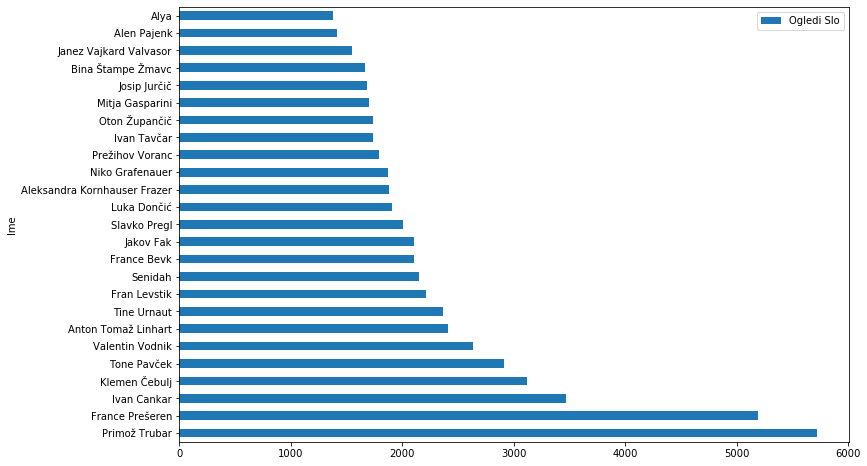

In [8]:
podatki[["Ime", "Ogledi Slo"]].sort_values("Ogledi Slo", ascending = False).head(25).plot.barh(x = "Ime", figsize = (12, 8))

In [9]:
print("Največ ogledov - Ang:")
podatki[["Ime", "Ogledi Ang"]].sort_values("Ogledi Ang", ascending = False).head(50)

Največ ogledov - Ang:


,Ime,Ogledi Ang
248,Melania Trump,240016
2308,Luka Dončić,70697
73,Slavoj Žižek,63202
2426,Nadiya Bychkova,59598
778,Jan Oblak,32048
88,Samir Handanović,27463
228,Željko Ivanek,22134
2434,Senidah,16485
92,Merlene Ottey,14790
213,Goran Dragić,12176


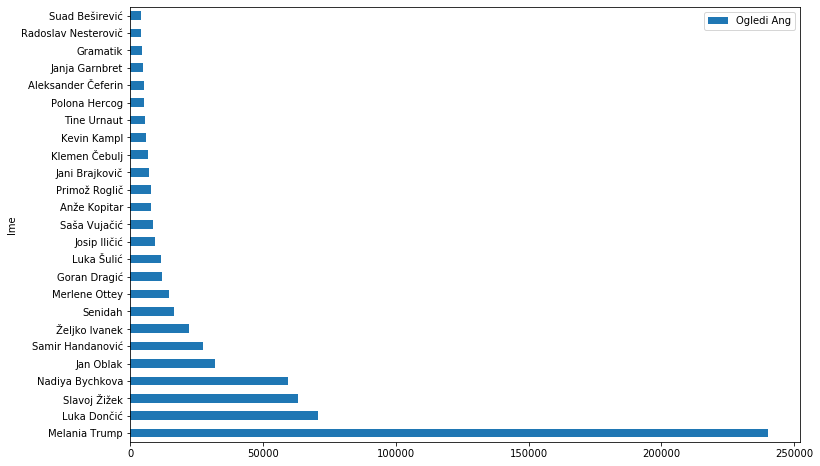

In [10]:
podatki[["Ime", "Ogledi Ang"]].sort_values("Ogledi Ang", ascending = False).head(25).plot.barh(x = "Ime", figsize = (12, 8))

Ali obstaja zveza med številom ogledov slovenske in angleške wiki strani?

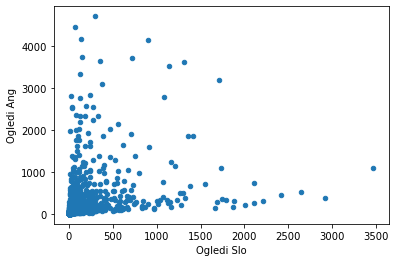

In [11]:
#Brez robnih primerov za lepši graf
podatki[(podatki["Ogledi Ang"] < 5000) & (podatki["Ogledi Slo"] < 4000)].plot.scatter(x = "Ogledi Slo", y = "Ogledi Ang")

**Sklep:** Števili ogledov v slovenščini in angleščini sta skoraj popolnoma neodvisni.

**Skupno število ogledov po poklicih:** Po čem so Slovenci najbolj znani doma in po čem v tujini?

In [12]:
poklici_vzorec = poklici_merge[["Poklic", "Ogledi Slo", "Ogledi Ang"]].groupby("Poklic").sum()
poklici_vzorec = poklici_vzorec[poklici_merge.groupby("Poklic").size() > 15]

print("Najpomembnejši poklici - Slo:")
poklici_vzorec[["Ogledi Slo"]].sort_values("Ogledi Slo", ascending = False).head(50)

Najpomembnejši poklici - Slo:


,Ogledi Slo
Poklic,
Pisatelj,89822
Pesnik,59990
Politik,44538
Prevajalec,35962
Jezikoslovec,24987
Dramatik,23119
Pevec,19803
Esejist,18850
Mladinski pisatelj,18004


In [13]:
print("Najpomembnejši poklici - Ang:")
poklici_vzorec[["Ogledi Ang"]].sort_values("Ogledi Ang", ascending = False).head(50)

Najpomembnejši poklici - Ang:


,Ogledi Ang
Poklic,
Nogometaš,160235
Košarkar,128162
Politik,119874
Univerzitetni profesor,76785
Esejist,72228
Filozof,71180
Teolog,68121
Sociolog,66618
Pisatelj,46475


## Dolžina članka in povezave na članek

**Dolžina članka:** Članek o kateri osebi je najdaljši na slovenski in angleški Wikipediji?

In [14]:
print("Najdaljši članki - Slo:")
podatki[["Ime", "Dolžina Slo"]].sort_values("Dolžina Slo", ascending = False).head(50)

Najdaljši članki - Slo:


,Ime,Dolžina Slo
96,Zoran Mušič,9170
892,Svetlana Makarovič,7477
34,Janez Janša,6792
1773,Zlatko Šugman,6747
1162,Boris A. Novak,6666
2308,Luka Dončić,6575
141,Lojze Peterle,6477
801,Alojz Rebula,5858
229,Drago Jančar,5758
523,Bojan Adamič,5667


In [15]:
print("Najdaljši članki - Ang:")
podatki[["Ime", "Dolžina Ang"]].sort_values("Dolžina Ang", ascending = False).head(50)

Najdaljši članki - Ang:


,Ime,Dolžina Ang
100,Polona Hercog,8088
2308,Luka Dončić,7647
34,Janez Janša,7215
88,Samir Handanović,7186
101,Katarina Srebotnik,7054
248,Melania Trump,6725
73,Slavoj Žižek,6363
308,Taja Kramberger,5876
12,Tina Maze,4933
221,Anže Kopitar,4891


Povprečna dolžina članka glede na leto rojstva:

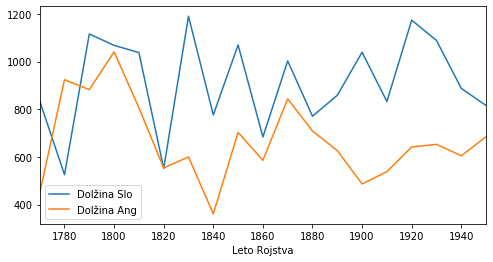

In [16]:
leta_10[leta_10["Leto Rojstva"] < 1960][["Leto Rojstva", "Dolžina Slo", "Dolžina Ang"]].groupby("Leto Rojstva").mean().plot(figsize = (8, 4))

**Število povezav:** Na katere strani se povezuje največ drugih člankov? Ali lahko iz tega sklepamo o pomembnosti osebe?

In [17]:
print("Največ povezav - Slo:")
podatki[["Ime", "Povezave Slo"]].sort_values("Povezave Slo", ascending = False).head(50)

Največ povezav - Slo:


,Ime,Povezave Slo
34,Janez Janša,1429
1039,Ciril Zlobec,1410
892,Svetlana Makarovič,1405
1162,Boris A. Novak,1381
229,Drago Jančar,1342
1773,Zlatko Šugman,1314
927,Anton Nanut,1283
373,Dimitrij Rupel,1233
1148,Irena Grafenauer,1225
523,Bojan Adamič,1223


In [18]:
print("Največ povezav - Ang:")
podatki[["Ime", "Povezave Ang"]].sort_values("Povezave Ang", ascending = False).head(50)

Največ povezav - Ang:


,Ime,Povezave Ang
101,Katarina Srebotnik,1828
73,Slavoj Žižek,1722
248,Melania Trump,884
100,Polona Hercog,826
120,Andreja Klepač,715
219,Blaž Kavčič,702
633,Aljaž Bedene,585
109,Mima Jaušovec,582
0,France Prešeren,572
34,Janez Janša,570


Ali obstajajo zveze med ogledi, dolžino članka in številom povezav v istem jeziku?

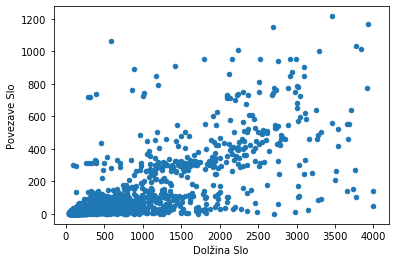

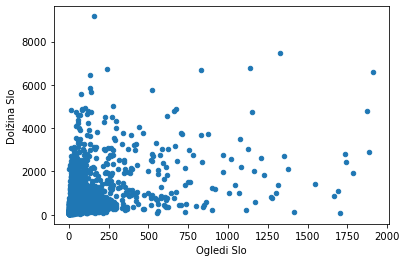

In [19]:
podatki[(podatki["Dolžina Slo"] < 4000)].plot.scatter(y = "Povezave Slo", x = "Dolžina Slo")

#Izključimo osebe z velikim številom ogledom za boljšo preglednost grafov
podatki[podatki["Ogledi Slo"] < 2000].plot.scatter(x = "Ogledi Slo", y = "Dolžina Slo")

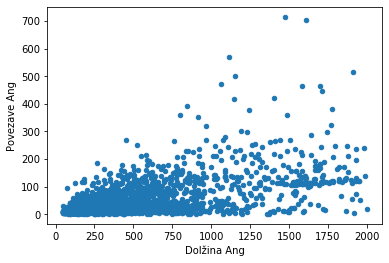

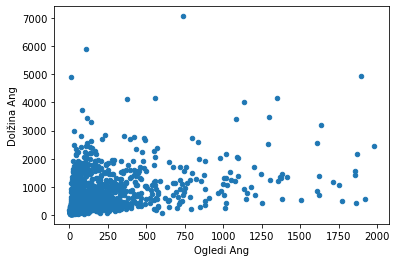

In [20]:
podatki[podatki["Dolžina Ang"] < 2000].plot.scatter(y = "Povezave Ang", x = "Dolžina Ang")
podatki[podatki["Ogledi Ang"] < 2000].plot.scatter(x = "Ogledi Ang", y = "Dolžina Ang")

**Povzetek:** Med številom ogledov, dolžino članka in številom povezav na članek ni očitne relacije.

## Starost in leta rojstva

**Število oseb po desetletjih:** Kako se je spreminjalo število pomembnih Slovencev?

In [21]:
st_leta = leta_10.groupby("Leto Rojstva").size()
st_leta

Leto Rojstva
1770      5
1780      6
1790      5
1800     12
1810      9
1820     12
1830     17
1840     10
1850     18
1860     24
1870     33
1880     41
1890     62
1900     86
1910    117
1920    144
1930    138
1940    220
1950    172
1960    289
1970    326
1980    411
dtype: int64

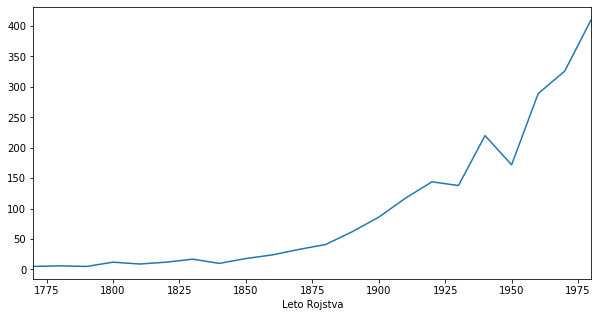

In [22]:
st_leta.plot(figsize = (10, 5))

**Starost:** Kdo so najstarejši Slovenci?

In [23]:
podatki[["Ime","Starost"]].sort_values("Starost", ascending = False).head(40)

,Ime,Starost
795,Katarina Marinič,110.0
223,Boris Pahor,106.0
414,Anton Vratuša,102.0
2273,Juta Krulc,102.0
196,Leon Štukelj,100.0
783,Peter Florjančič,100.0
1755,Vida Jeraj Hribar,100.0
1937,Janko Lavrin,99.0
2369,Ignac Gregorač,99.0
2334,Marta Brilej,99.0


Povprečna življenska doba po desetletjih:

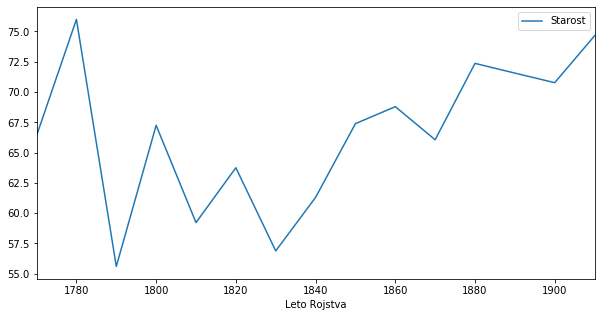

In [24]:
starost_10 = leta_10[(leta_10["Leto Rojstva"] < 1920) & (leta_10.Stanje == "Mrtev")]
starost_10 = starost_10[["Leto Rojstva", "Starost"]].groupby(["Leto Rojstva"]).mean()
starost_10.plot(figsize = (10, 5))

Življenska doba po spolih:

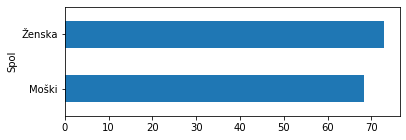

In [25]:
starost_spol = mrtvi[["Spol", "Starost"]].groupby("Spol").mean()
starost_spol.Starost.plot.barh(figsize = (6, 2))

Življenska doba po poklicih:

In [26]:
starost_poklic = poklici_merge[poklici_merge.Stanje == "Mrtev"][["Poklic", "Starost"]]
starost_poklic_vzorec = starost_poklic.groupby("Poklic").mean().round(1)

#Obravnavamo le poklice z dovolj velikim vzorcem, da gospodinje ne živijo povprečno 110 let.
starost_poklic_vzorec = starost_poklic_vzorec[starost_poklic.groupby("Poklic").size() > 8]
starost_poklic_vzorec.sort_values("Starost")

,Starost
Poklic,
Atlet,57.8
Vojaška osebnost,60.1
Nogometaš,61.2
Alpinist,62.7
Alpski smučar,62.9
Veslač,63.5
Pesnik,63.6
Glasbenik,64.2
Izumitelj,64.6


**Povzetek:** V povprečju imajo krajšo življensko dobo športniki in poklici, ki so bili bolj pogosti v preteklosti (duhovnik, redovnik).

## Mesta

**Kraji po številu rojenih znanih oseb:** V katerih krajih se je rodilo največ znanih Slovencev?

In [27]:
kraji_st = podatki.groupby("Rojstni Kraj").size().sort_values(ascending = False)
kraji_st.name = "Število Rojenih"
kraji_st.head(40)

Rojstni Kraj
Ljubljana                 654
Maribor                   162
Kranj                     140
Celje                     126
Jesenice                  101
Koper                      54
Novo mesto                 48
Slovenj Gradec             34
Brežice                    30
Trbovlje                   26
Bled                       26
Postojna                   25
Murska Sobota              24
Ptuj                       22
Trst                       19
Šempeter pri Gorici        19
Izola                      14
Škofja Loka                14
Nova Gorica                13
Idrija                     12
Beograd                    11
Kamnik                     10
Mojstrana                   9
Krško                       7
Piran                       6
Kranjska Gora               6
Velenje                     6
Slovenska Bistrica          6
Beltinci                    6
Trebnje                     5
Metlika                     5
Buenos Aires                5
Črnomelj                   

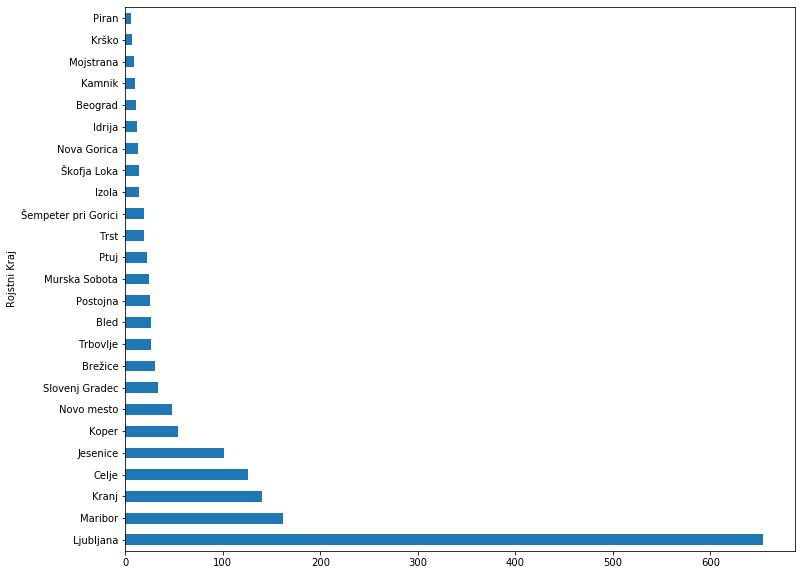

In [28]:
kraji_st.head(25).plot.barh(figsize = (12, 10))

**Starost mest:** Ali iz povprečnega rojstnega leta oseb lahko sklepamo, kdaj je bilo mesto najbolj razvito/pomembno?

In [29]:
#Obravnavamo kraje, ki imajo dovolj velik vzorec rojenih oseb (vsaj 5)
kraji_vzorec = kraji_st[kraji_st >= 5]
kraji_avg = pd.merge(kraji_vzorec, (podatki.groupby("Rojstni Kraj").mean()), right_on = "Rojstni Kraj", left_on = "Rojstni Kraj")
kraji_leto = kraji_avg["Leto Rojstva"].round().map(int).sort_values()
kraji_leto

Rojstni Kraj
Kamnik                 1869
Beltinci               1870
Idrija                 1876
Krško                  1877
Tržič                  1906
Trebnje                1908
Škofja Loka            1908
Trst                   1913
Mojstrana              1922
Kranjska Gora          1923
Metlika                1932
Črnomelj               1936
Brežice                1941
Beograd                1943
Ljubljana              1943
Celje                  1944
Novo mesto             1944
Buenos Aires           1946
Murska Sobota          1948
Bled                   1950
Izola                  1951
Domžale                1952
Piran                  1952
Jesenice               1954
Postojna               1958
Trbovlje               1958
Maribor                1959
Nova Gorica            1961
Slovenska Bistrica     1963
Kranj                  1963
Ptuj                   1965
Koper                  1967
Slovenj Gradec         1974
Šempeter pri Gorici    1975
Velenje                1978
Name: L

**Sklep:** Nekatera zgodovinsko pomembna mesta (Idrija, Škofja Loka) imajo nižje povprečno leto rojstva kot novejša mesta (Velenje). To v splošnem ne velja (npr. Ptuj).

## Poklici

Kateri so najpogostejši poklici znanih poklicev - po čem smo Slovenci najbolj znani?

In [30]:
st_poklicev = poklici_merge.groupby("Poklic").size().sort_values(ascending = False)
st_poklicev.name = "Število"
st_poklicev.head(50)

Poklic
Pisatelj                  355
Nogometaš                 284
Politik                   224
Pesnik                    179
Prevajalec                146
Hokejist                  111
Novinar                   104
Alpski smučar             101
Jezikoslovec              100
Atlet                      91
Urednik                    89
Smučarski skakalec         89
Duhovnik                   85
Skladatelj                 81
Slikar                     73
Košarkar                   71
Rokometaš                  71
Kolesar                    69
Dramatik                   65
Smučarski tekač            64
Esejist                    64
Pevec                      58
Pravnik                    54
Univerzitetni profesor     53
Nogometni trener           51
Zgodovinar                 51
Igralec                    51
Mladinski pisatelj         51
Odvetnik                   48
Učitelj                    48
Partizan                   48
Filozof                    47
Veslač                     47
Pla

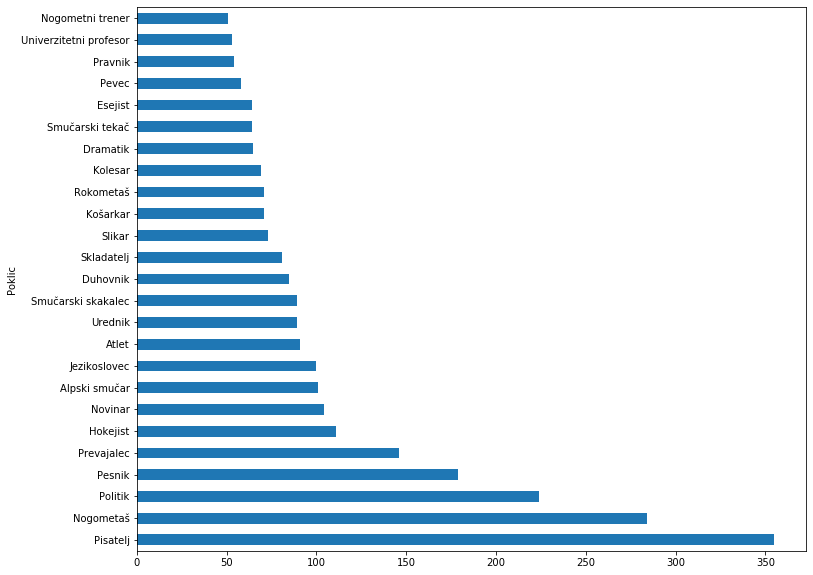

In [31]:
st_poklicev.head(25).plot.barh(figsize = (12, 10))

Najpogostejši poklici oseb z več kot 100 ogledi:

In [32]:
poklici_znanih = pd.merge(poklici, zelo_znani, left_on = "ID", right_on = "ID")
poklici_znanih = poklici_znanih.groupby("Poklic").size().sort_values(ascending = False)
poklici_znanih.name = "Število"
poklici_znanih.head(40)

Poklic
Pisatelj                  84
Politik                   74
Pesnik                    49
Pevec                     34
Nogometaš                 32
Prevajalec                28
Jezikoslovec              23
Novinar                   22
Igralec                   20
Skladatelj                18
Dramatik                  18
Esejist                   17
Odvetnik                  16
Pravnik                   16
Košarkar                  15
Mladinski pisatelj        15
Duhovnik                  13
Partizan                  13
Urednik                   13
Univerzitetni profesor    12
Politični komisar         12
Tekstopisec               11
Filmski igralec           11
Nogometni trener          10
Alpski smučar             10
Atlet                      9
Slikar                     9
Teolog                     8
Televizijski voditelj      8
Scenarist                  8
Glasbenik                  8
Gledališki igralec         8
Diplomat                   8
Kantavtor                  8
Literar

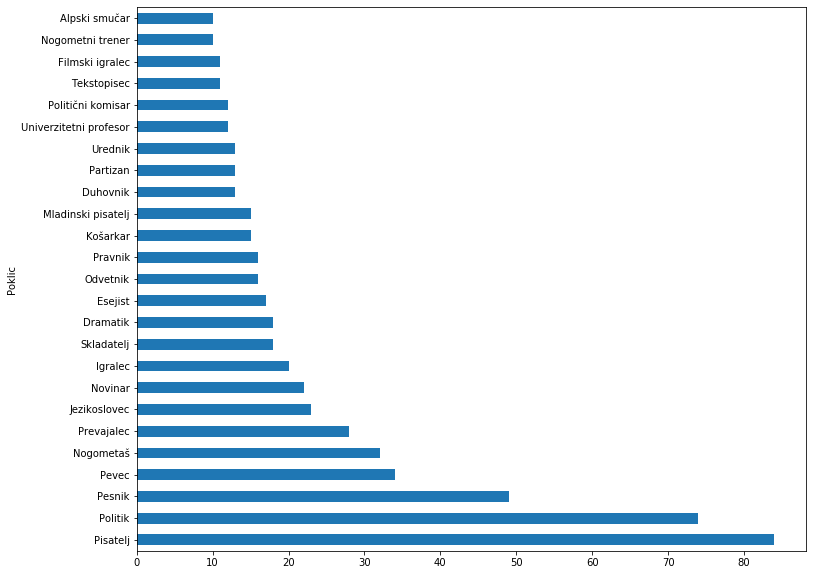

In [33]:
poklici_znanih.head(25).plot.barh(figsize = (12, 10))

**Razmerje spolov po poklicih:** S čim se ukvarjajo moški in s čim ženske?

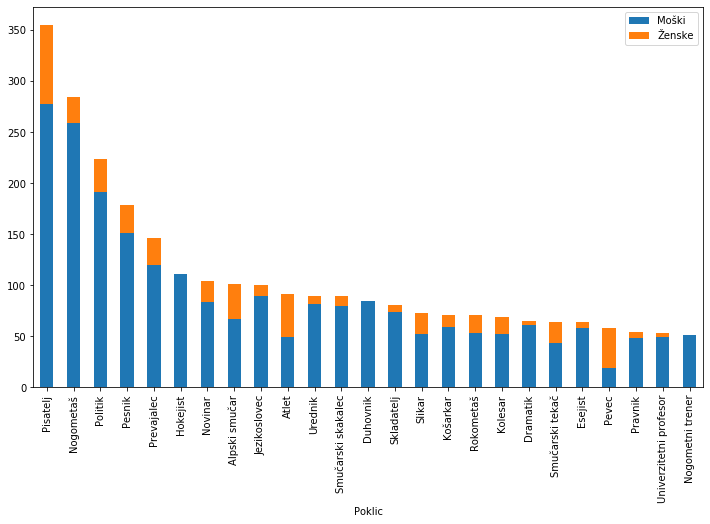

In [34]:
def count_to_int(x):
    try:
        return int(x)
    except:
        return 0

poklic_spol_st= poklici_merge.groupby(["Poklic", "Spol"]).size().unstack().apply(lambda col: col.map(count_to_int))
poklic_spol_st = pd.merge(st_poklicev, poklic_spol_st, left_on = "Poklic", right_on = "Poklic").rename(columns = {"Ženska": "Ženske"})
poklic_spol_st[["Moški", "Ženske"]].head(25).plot.bar(stacked = True, figsize = (12, 7))

In [35]:
poklic_spol_st_vzorec = poklic_spol_st[poklic_spol_st["Število"] >= 10]
poklic_spol_razmerje = (poklic_spol_st_vzorec["Ženske"] * 100) / poklic_spol_st_vzorec["Število"]
poklic_spol_razmerje.name = "Odstotek Žensk"
poklic_spol_razmerje.sort_values(ascending = False).map(lambda x: str(round(x, 1)) + " %")

Poklic
Model                           90.0 %
Pevec                           67.2 %
Operni pevec                    60.0 %
Tenisač                         59.3 %
Gledališki igralec              59.1 %
Filmski igralec                 55.2 %
Televizijski voditelj           50.0 %
Mladinski pisatelj              49.0 %
Atlet                           46.2 %
Plavalec                        45.7 %
Ilustrator                      42.2 %
Judoist                         42.1 %
Igralec                         37.3 %
Knjižničar                      36.4 %
Šahist                          36.4 %
Telovadec                       35.7 %
Alpski smučar                   33.7 %
Publicist                       33.3 %
Kajakaš                         33.3 %
Biatlonec                       33.3 %
Smučarski tekač                 32.8 %
Slikar                          28.8 %
Kantavtor                       27.3 %
Slavist                         27.3 %
Kemik                           27.3 %
Učitelj           

## Spol

**Razmerje med spoloma:**

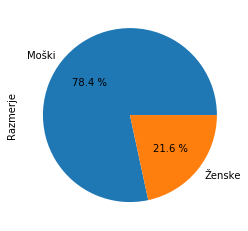

In [36]:
razmerje = podatki.groupby("Spol").size().rename(index = {"Ženska": "Ženske"})
razmerje.name = "Razmerje"
razmerje.plot.pie(autopct = lambda x: str(round(x, 1)) + " %")

Razmerje med spoloma po desetletjih:

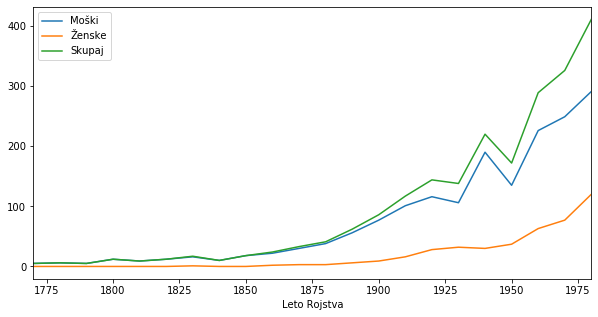

In [37]:
spol_leta = leta_10.groupby(["Leto Rojstva", "Spol"]).size().unstack().apply(lambda col: col.map(count_to_int))
sl_skupaj = spol_leta["Moški"] + spol_leta["Ženska"]
sl_skupaj.name = "Skupaj"
spol_leta = pd.merge(spol_leta, sl_skupaj, left_on = "Leto Rojstva", right_on = "Leto Rojstva").rename(columns = {"Ženska": "Ženske"})
spol_leta.plot(figsize = (10, 5))

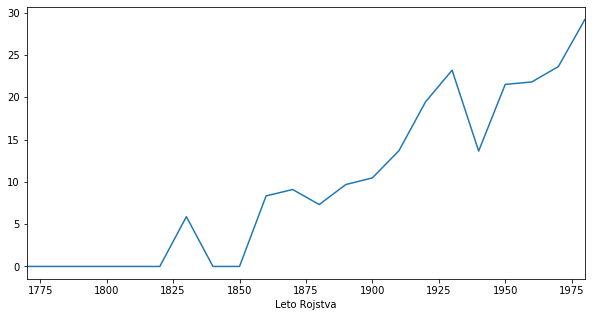

In [38]:
zenske_leta_odstotek = spol_leta["Ženske"] * 100 / spol_leta["Skupaj"]
zenske_leta_odstotek.plot(figsize = (10, 5))

**Povzetek:** Skozi čas se je delež žensk med znanimi Slovenci v povprečju povečeval.

In [39]:
podatki[["Spol", "Ogledi Slo", "Ogledi Ang", "Povezave Slo", "Povezave Ang", "Dolžina Slo", "Dolžina Ang"]].groupby("Spol").mean().round(1)

,Ogledi Slo,Ogledi Ang,Povezave Slo,Povezave Ang,Dolžina Slo,Dolžina Ang
Spol,,,,,,
Moški,105.0,325.6,98.1,56.3,689.1,573.0
Ženska,85.3,760.8,56.9,53.2,516.2,537.2



### Najbolj znani slovenski matematiki

In [40]:
poklici_merge[poklici_merge.Poklic == "Matematik"][["Ime", "Ogledi Ang", "Ogledi Slo"]].sort_values("Ogledi Ang", ascending = False)

,Ime,Ogledi Ang,Ogledi Slo
80,Jožef Stefan,1027,342
161,Jurij Vega,423,582
1095,Herman Koroški,368,46
2385,Dragan Marušič,228,35
4002,Vladimir Batagelj,201,25
3696,Tomaž Pisanski,195,29
834,Josip Plemelj,184,83
35,Ferdinand Avguštin Hallerstein,136,91
3568,Marko Petkovšek,75,9
4665,Dorjan Marušič,73,63



#### 6 najbolj znanih slovenskih pesnikov

In [41]:
poklici_merge[poklici_merge.Poklic == "Pesnik"][["Ime", "Ogledi Ang", "Ogledi Slo"]].sort_values("Ogledi Ang", ascending = False).head(6)

,Ime,Ogledi Ang,Ogledi Slo
1,France Prešeren,2032,5194
553,Boris Pahor,1351,465
570,Drago Jančar,1298,524
388,Oton Župančič,1099,1736
66,Ivan Cankar,1086,3467
83,Jožef Stefan,1027,342
